## Modelo de epidemiologia para disseminação do COVID-19
### Autor de Referência: Dr. Wladimir Lyra, Universidade Estadual do Novo México

## Referências: 

https://github.com/CSSEGISandData/

### [Modelo matemático para simular a transmissibilidade baseada em fases de um novo coronavírus ](https://idpjournal.biomedcentral.com/articles/10.1186/s40249-020-00640-3)

### [Modelando a epidemia de coronavírus em uma cidade com Python ](https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2)





Neste código, foi utilizado um modelo SIR (suscetível-infectado-removido). Os vestígios modelar a evolução de uma população susceptível  $S$, infectado  $I$, e população removida, $R$. As equações são 


\begin{eqnarray}
\frac{dS}{dt} &=&-\beta I S \\
\frac{dI}{dt} &=& \beta I S - \gamma I\\
\frac{dR}{dt} &=&\gamma I
\end{eqnarray}


$\beta$ é a taxa de infecção e a $\gamma$ a taxa de recuperação. 

O contato com pessoas infectadas remove uma fração da população suscetível na taxa $\beta I S $, olocando-a na população infectada. Ao mesmo tempo, a população infectada tem uma taxa de recuperação $\gamma$. Um número $\gamma I$ é removido do infectado e colocado na população removida. 


### O parâmetror $R_0$

Podemos entender a dinâmica da população infectada escrevendo sua equação como

\begin{equation}
\frac{dI}{dt} = \gamma I \left(\frac{\beta}{\gamma} S - 1 \right),
\end{equation}

e notando que no início da infecção  $S \approx  1$ , quando (as populações são normalizadas por $N=S+I+R$ onde $N$ é o tamanho da população), reduz-se a

\begin{equation}
\frac{dI}{dt} \approx \gamma I \left(\frac{\beta}{\gamma}  - 1 \right).
\end{equation}

A dinâmica da população infectada é controlada pelo parâmetro

\begin{equation}
R_0 = \frac{\beta}{\gamma}
\end{equation}

Quando $R_0 > 1$ a população infectada cresce exponencialmente. Quando $R_0 \leq 1$ a doença é controlada.  

$R_0$ pode ser considerado o número médio de pessoas que uma pessoa infectada contaminará antes de ser removida. Como tal, é chamado o número de reprodução básico. O distanciamento social tem o efeito de diminuir a taxa de infecção $\beta$e, portanto, o número básico de reprodução $R_0$. 

### Tempo de duplicação e aplicação às atuais epidemias de COVID-19

Tendo por base 

\begin{equation}
\frac{dI}{dt} \approx \gamma I \left(R_0  - 1 \right)
\end{equation}

Nós podemos referenciar que o tempo de dobra da infecção $R_0$. O tempo de dobragem-e é 

\begin{equation}
t_e = \frac{1}{\gamma \left(R_0-1\right)}
\end{equation}

Logo o tempo de dúvida é

\begin{equation}
t_{\rm double} = t_e \ \ln 2 = \frac{\ln 2}{\gamma \left(R_0-1\right)}
\end{equation}

Dados da China e da Coréia do Sul sugerem que a taxa de recuperação é $\gamma=0.06$. Como tal, o tempo de duplicação e  $R_0$ são relacionados pelo gráfico abaixo. Também são mostradas as taxas de duplicação da China, Coréia do Sul, Itália e EUA, em 14 de março de 2020.

In [1]:
import numpy as np
import pylab as plt
import sys 
#
gamma = 0.06

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE) # controls default text sizes                   
plt.rc('axes', titlesize=MEDIUM_SIZE) # fontsize of the axes title               
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels           
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize                         
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title


In [2]:
def date_to_time(d):
    from datetime import datetime    

    n=len(d)    
    
    date=np.zeros(n)
    for i in range(n):
        date_object = datetime.strptime(d[i], '%m/%d/%y')
        date[i] = datetime.fromisoformat(np.str(date_object)).timestamp()
                  
    return (date-date[n-1])/86400.                
    
    
def calc_doubling_time(time,cases):

    exponential_slope = np.gradient(np.log(1.0*cases+1e-10),time) 

    n=len(exponential_slope)
    doubling_time=np.zeros(n)
    for i in range(n):
        if (exponential_slope[i] != 0):
            doubling_time[i] = np.log(2.)/exponential_slope[i]
        else:
            doubling_time[i]=0.0
    
    return doubling_time

def read_jhu_data(country,mode):
    import csv
    base='./dat/time_series_19-covid-' 
    with open(base+mode+'.csv', newline='') as csvfile:
        datareader = csv.reader(csvfile)#, delimiter=',', quotechar='|')
        data = {} 
        for row in datareader:
            if (row[0] == 'Province/State'):
                n=len(row)
                dates = row[4:n]
                for i in range(len(dates)):
                    data[dates[i]]=0
            else:
                if (row[1]==country):
                    for i in range(len(dates)):
                        data[dates[i]] += np.int(row[i+4])
    
    return data,dates                
             
def get_data_country(name):

    dict_confirmed,dates = read_jhu_data(name,'Confirmed')
    dict_recovered,dates = read_jhu_data(name,'Recovered')
    dict_deaths,dates    = read_jhu_data(name,'Deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_recovered.keys())
    if (n1!=n2):
        sys.exit()
    n3=len(dict_deaths.keys())    
    if (n2!=n3):
        sys.exit()
    
    confirmed=np.zeros(len(dates))
    recovered=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        recovered[i] = dict_recovered[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]


    country = dict([
                    ('name',name),
                    ('dates', dates),
                    ('confirmed', confirmed),
                    ('recovered', recovered),
                    ('deaths', deaths),
                   ])        
        
    return country

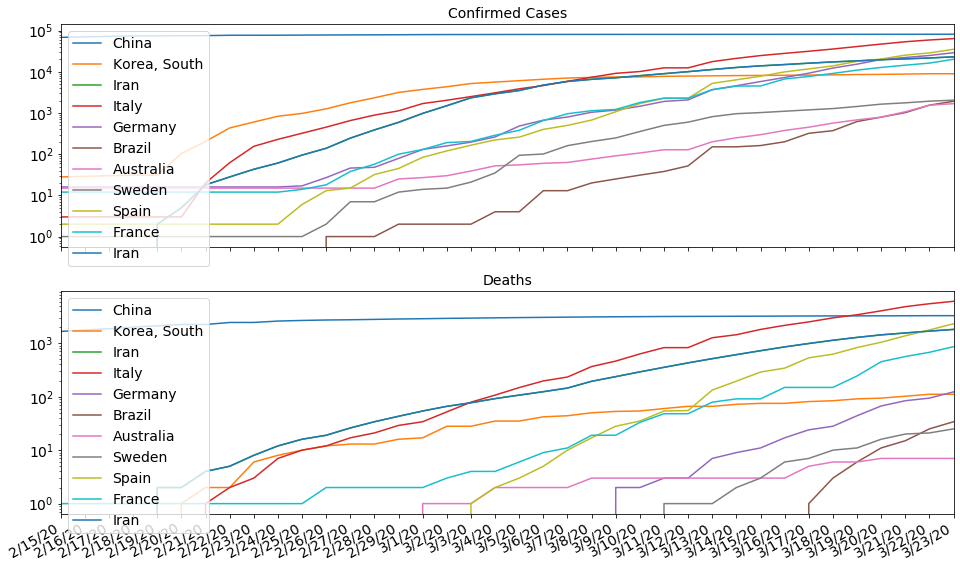

In [4]:
import matplotlib.dates as mdates

fig, (ax1,ax2) = plt.subplots(2,1,figsize=[16,10])

f = get_data_country('China')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Korea, South')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Iran')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Italy')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Germany')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Brazil')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Australia')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Sweden')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

#f = get_data_country('US')
#ax1.plot(f['dates'],f['confirmed'],label=f['name'])
#ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Spain')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('France')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Iran')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

ax1.fmt_xdata = mdates.DateFormatter('%m/%d/%y')
ax2.fmt_xdata = mdates.DateFormatter('%m/%d/%y')

ax1.set_yscale("log")
ax2.set_yscale("log")

ax1.legend()
ax2.legend()

ax1.set_title('Confirmed Cases')
ax2.set_title('Deaths')

ax1.set_xlim(["2/15/20","3/23/20"])
ax2.set_xlim(["2/15/20","3/23/20"])

fig.autofmt_xdate()

plt.show()

### Taxa de mortalidade 

O último parâmetro no modelo é a taxa de mortalidade. Os removidos são recuperados / curados (C) ou mortos (D), de acordo com

\begin{eqnarray}
C &=& (1-\mu) R \\
D &=& \mu R 
\end{eqnarray}

Onde $\mu$ é a taxa de mortalidade. Os curados supostamente ganharam imunidade e não foram adicionados novamente à população suscetível. O conhecimento atual da epidemia parece implicar $\mu$=0.01. 

### Modelo aplicado às epidemias atuais 

Dado um universal $\gamma=0.06$, a entrada do modelo são os tempos de duplicação $t_{\rm double}$ e o número inicial de infectados   $I_0$. Abaixo estão os números de 14 de março para a Itália, Coréia do Sul, China e EUA. A população total é apenas para fins de normalização. O modelo assume N = 1 e trabalha com frações populacionais.

In [5]:
def select_country(name):
    
    dict_confirmed,dates = read_jhu_data(name,'Confirmed')
    dict_recovered,dates = read_jhu_data(name,'Recovered')
    dict_deaths,dates    = read_jhu_data(name,'Deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_recovered.keys())
    if (n1!=n2):
        sys.exit()
    n3=len(dict_deaths.keys())    
    if (n2!=n3):
        sys.exit()
    
    #mdates = dict_confirmed[dates[-1]]
    confirmed=np.zeros(len(dates))
    recovered=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        recovered[i] = dict_recovered[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]

    mu=0.01  
    R0=6.5
    D0=6.

#    print(deaths)
        
    if (name == 'Italy'):
        N=6e7 
        R0=5.75 
        # start the model at a statistically significant number
        D0=6.
        name_pt = 'It'+r'${\rm \'a}$'+'lia'
        namept = 'Itália'
    elif (name == "Korea, South"):
        N=5.1e7
        name_pt = 'Cor'+r'${\rm \'e}$'+'ia do Sul'
        namept = 'Coréia do Sul'
    elif (name=="China"):
        N=1.4e9
        name_pt = 'China'
        namept = 'China'
    elif (name=="US"):
        N=3.2e8
        R0=4.
        name_pt = 'EUA'
        namept = 'EUA'
    elif (name=="Sweden"):
        N=1e7
        name_pt = 'Su'+r'${\rm \'e}$'+'cia'
        namept = 'Suécia'
    elif (name=="Brazil"):
        N=2.1e8
        R0=8.
        D0=6.
        name_pt = 'Brasil'
        namept = 'Brasil'
    elif (name=="Germany"):
        N=8.3e7
        name_pt = 'Alemanha'
        namept = 'Alemanha'
    elif (name=='Spain'):
        N=4.666e7
        name_pt = 'Espanha'
        namept = 'Espanha'
    elif (name=='Iran'):
        N=8.1e7
        name_pt = 'Ir'+r'$\rm {\c \~{a}}$'
        namept = 'Irã'
    else:
        print("choose a valid country")
        sys.exit()
           
    index_D0 = [i for i in range(len(deaths)) if deaths[i] >= D0][0]
    date_D0 = dates[index_D0]
    
    days_past=date_to_time(dates)    
    time_D0=days_past[index_D0]
    doubling_time=calc_doubling_time(days_past,confirmed)[len(days_past)-1]    

    country = dict([
                    ('name', name),
                    ('gamma', gamma),
                    ('D0',D0),
                    ('R0',R0),        
                    ('N',N),
                    ('days past',days_past),
                    ('cases',confirmed),
                    ('doubling time',doubling_time),
                    ('recovered',recovered),
                    ('deaths',deaths),
                    ('mu',mu),
                    ('time_D0',time_D0),
                    ('index_D0',index_D0),
                    ('name_pt',name_pt)
                   ])
    
    print("Parametros para:",namept)
    print("Tempo de Dobra =",round (doubling_time,3)," dias")
    print('Infecções acumuladas=', dict_confirmed[dates[-1]] )
    
    return country

In [6]:
def appendvalues(S,I,R,t,SS,II,RR,tt):
    SS.append(S)
    II.append(I)
    RR.append(R)
    tt.append(t)
    return SS,II,RR,tt

def RK3(f):
    gamma     = f['gamma']
    N         = f['N']
    mu        = f['mu']
    R0        = f['R0'] 
    D0        = f['D0']
    time_D0   = f['time_D0']
    iD0       = f['index_D0']
    days_past = f['days past']
    deaths    = f['deaths']    
    name      = f['name']

    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5

    #
    # Deaths reflect infections 1/gamma days past
    #
    tgamma=1./gamma  
    I0    = D0/mu
#    
    cases=np.array(deaths[iD0:len(deaths)-1])
    tpast=days_past[iD0:len(deaths)-1]
    exponential_slope = np.gradient(np.log(1.0*cases+1e-10),tpast) 
    past_beta = gamma + exponential_slope   
    current_beta=past_beta[len(past_beta)-1]
#
#  Timestep defined by the timescale given by the rate of infection 
#
    tau_beta  = 1./current_beta
    dt = Cdt*tau_beta
#    
# End of epidemics. 
#
    tmax = 1.5*tgamma
#
# Lists to store the populations 
#
    SS=[]  # susceptible
    II=[]  # infected
    RR=[]  # removed    
    tt=[]  # time
#
# Initial values 1/gamma ago  
#
    I=I0/N
    R=0.
    S=1-I-R
#
#  To start the calculations
#
    init_beta=R0*gamma
    
    dSdt = -init_beta*I*S
    dIdt =  init_beta*I*S - gamma*I 
    dRdt =                  gamma*I
#
#  Start the integration
    itmax=100000   
#
#  Use t=0 as the time of first death minus 1/gamma
#
    t= time_D0-tgamma
    ds=0.
#
    if (name=="Italy"):
        time_lockdown = date_to_time(['02/27/20','03/23/20'])[0]
    elif (name=="Brazil"):
        time_lockdown = date_to_time(['03/18/20','03/23/20'])[0]
    elif (name=="US"):
        time_lockdown = date_to_time(['03/19/20','03/23/20'])[0]
    else: 
        time_lockdown = date_to_time(['02/15/20','03/23/20'])[0]

    beta=np.zeros(2)
    I2=I
    S2=S
    R2=R
    SS2=[]  # susceptible
    II2=[]  # infected
    RR2=[]  # removed

    SS,II,RR,tt = appendvalues(S,I,R,t,SS,II,RR,tt)
    SS2.append(S2)
    RR2.append(R2)
    II2.append(I2)
    
    for it in np.arange(itmax):
#                                                                                
        dt_beta_ts = [i * dt for i in beta_ts]
#                                                                                
        if (t < time_D0):
            beta[0] = init_beta
            beta[1] = beta[0]
        elif (t >= time_D0 and t < time_lockdown):    
            beta[0] = np.interp(t,tpast,past_beta)
            beta[1] = beta[0]
        elif (t >= time_lockdown and t < 0):
            # split here beta with and without action
            beta[0] = np.interp(t,tpast,past_beta)/2
            beta[1] = np.interp(t,tpast,past_beta)
        else:
            beta = beta
            
#
# advance quantities
#

        for itsub in np.arange(0,2):
            dSdt   = alpha_ts[itsub]*dSdt
            dIdt   = alpha_ts[itsub]*dIdt
            dRdt   = alpha_ts[itsub]*dRdt
            ds  = alpha_ts[itsub]*ds
            
            dSdt = dSdt - beta[0]*I*S
            dIdt = dIdt + beta[0]*I*S - gamma*I   
            dRdt = dRdt               + gamma*I
            ds  = ds   + 1. 
            
            S = S + dt_beta_ts[itsub]*dSdt
            I = I + dt_beta_ts[itsub]*dIdt
            R = R + dt_beta_ts[itsub]*dRdt
            t   = t + dt_beta_ts[itsub]*ds
            
        SS,II,RR,tt = appendvalues(S,I,R,t,SS,II,RR,tt)

        for itsub in np.arange(0,2):
            dSdt   = alpha_ts[itsub]*dSdt
            dIdt   = alpha_ts[itsub]*dIdt
            dRdt   = alpha_ts[itsub]*dRdt
            dSdt = dSdt - beta[1]*I2*S2
            dIdt = dIdt + beta[1]*I2*S2 - gamma*I2  
            dRdt = dRdt                 + gamma*I2
            S2 = S2 + dt_beta_ts[itsub]*dSdt
            I2 = I2 + dt_beta_ts[itsub]*dIdt
            R2 = R2 + dt_beta_ts[itsub]*dRdt
        SS2.append(S2)
        II2.append(I2)
        RR2.append(R2)
#               
        if ((it == itmax) or t > tmax):
            print(f'fim da simulação t = {np.int(t):d} dias \n')
            print('Pessoas que evitaram a infecção, S=',np.int(np.round(100*S)),'%')       
            print('Percentual de infectados: ',np.int(np.round(100*I)),'%')    
            print('Percentual de curados: ',np.int(np.round(100*R)),'%')
            #print('Pico perrcentual de infectados: ',np.int(np.round(100*np.array(II).max())),'%')    
            #print(f'Número de Mortes = {np.int(max(deaths)):d}')

            break
            
    results = dict([('Susceptible', SS),('Infected', II), ('Recovered', RR),
                    ('S2', SS2),('I2', II2), ('R2', RR2),
                    ('Time',tt)])
        
    return results

In [13]:
def plottage(country,results):

    import matplotlib.dates as mdates
    import datetime
    
    t=np.array(results['Time'])    
    S=np.array(results['Susceptible'])
    I=np.array(results['Infected'])
    R=np.array(results['Recovered'])

    S2=np.array(results['S2'])
    I2=np.array(results['I2'])
    R2=np.array(results['R2'])

    N         = country['N']
    gamma     = country['gamma']
    mu        = country['mu']
    deaths    = country['deaths']
    days_past = country['days past']
    D0        = country['D0']
    name   =country['name']
    name_pt=country['name_pt']    
#
    strS='Suscet'+r'${\rm {\'{\i}}}$'+'veis'
    strI='Infectados'
    strR='Curados'
    strD='Mortos'
    strII='Infecc'+r'$\rm {\c \~{o}}$'+'es'
    strDD='Mortes'
    strdt='Tempo de Dobra'
    strdays='dias'
    strDays='Dias'
    strPop="Porcentagem da Populac"+r'$\rm {\c \~{a}}$'+"o (%)"
    strCas="No Cumulativo de Casos"


    #fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=[15,15])
    
    fig, (ax2) = plt.subplots(1,1,figsize=[15,7])

# Evolution of the populations

    n=len(R)
    
    cummI=I+R    
    D=np.zeros(n)
    tgamma=1./gamma
    tretarted = t + tgamma
    cummIprior = np.interp(t,tretarted,cummI)
    D=mu*cummIprior
    print("Número de mortos:", np.int(max(deaths)))
    datelist=[]
    for i in range(len(t)):
        datelist.append(datetime.datetime.today() + datetime.timedelta(days=t[i]))
        
    date64=np.array(datelist, dtype='datetime64')         
    date=date64.astype('O')
    
    #ax1.plot(date,100*S,color='green' ,label=strS)
    #ax1.plot(date,100*I,color='orange',label=strI)
    #ax1.plot(date,100*R,color='blue'  ,label=strR)

    #ax1.plot(date,100*S2,color='green' ,linestyle=':')
    #ax1.plot(date,100*I2,color='orange',linestyle=':')
    #ax1.plot(date,100*R2,color='blue'  ,linestyle=':')
        
    #ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    
# Cumulative number of infections and deaths 
    strInter="Intervenc"+r'$\rm {\c \~{a}}$'+"o" 

    ax2.plot(date,N*(I+R+D),color='orange',label="No de Casos (Modelo com "+strInter+" )")
    itD0     = [i for i in range(n) if D[i] >= (D0+1)/N][0] 
    ax2.plot(date[itD0-1:n-1],N*D[itD0-1:n-1],color='black',label=strDD+" (Modelo com "+strInter+" )")

    cummI2=I2+R2
    D2=np.zeros(n)
    cummI2prior = np.interp(t,tretarted,cummI2)
    D2=mu*cummI2prior
    ax2.plot(date,N*(I2+R2+D2),color='orange',linestyle=":",label="No de Casos (Modelo sem "+strInter+" )")
    ax2.plot(date[itD0-1:n-1],N*D2[itD0-1:n-1],color='black',linestyle=":",label=strDD+' (Modelo sem '+strInter+" )")
    
    pastdatelist=[]
    for i in range(len(days_past)):
        pastdatelist.append(datetime.datetime.today() + datetime.timedelta(days=days_past[i]))
    pastdate64=np.array(pastdatelist, dtype='datetime64')         
    pastdate=pastdate64.astype('O')    
    ax2.plot(pastdate,country['cases'],'o',color='orange',label='Casos Confirmados')
    ax2.plot(pastdate,country['deaths'],'o',color='black',label='Mortes')
    ax2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
#
#  Doubling times 
#
    #a=np.array(country['cases'])
    #b=np.array(country['deaths'])
    #a=calc_doubling_time(days_past,np.array(country['cases']))
    #b=calc_doubling_time(days_past,np.array(country['deaths']))
    #ax3.plot(pastdate,a,color='orange',label='Casos Confirmados')
    #ax3.plot(pastdate,b,color='black',label='Mortes')
    #ax3.set_ylim([0,10])    
    #ax3.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

    # Annotations and prettifying 

    #ax1.set_ylabel(strPop)
    #ax1.legend(loc="best",fancybox=True,shadow=True)
    #title=name_pt+" Populac"+r'$\rm {\c \~{o}}$'+"es"
    
    #ax1.axvline(datetime.datetime.today(),linestyle='--',color='black')
    #ax1.annotate('Hoje', xy=(datetime.datetime.today(), 80),rotation=-90,color='black')
    
    #ax1.set_title(title)
    #ax1.grid()

    ax2.set_yscale("log")
    ax2.set_ylim([1,1.5*N])
    #ax2.set_xlim(['2020-03-10','2020-03-30'])
    ax2.set_ylabel(strCas)
    title=name_pt+" Cumulativo"#+", $N$="+strlog+", $I_{tot}$="+np.str(np.int(I0))
    ax2.set_title(title)

    ax2.axvline(datetime.datetime.today(),linestyle='--',color='black')
    ax2.annotate('Hoje', xy=(datetime.datetime.today(), 1e5),rotation=-90,color='black')

    if (name=='Italy'):
        date_object = datetime.datetime.strptime('02/27/20', '%m/%d/%y')
        ax2.axvline(date_object,linestyle=':',color='purple')
        ax2.annotate('Escolas fechadas', xy=(date_object, 1e4),rotation=-90,color='purple')

        ax2.axvline(date_object+datetime.timedelta(days=+1/gamma),linestyle='--',color='purple')
        ax2.annotate(np.str(np.int(np.round(1/gamma)))+' dias depois de\nEscolas Fechadas', 
                 xy=(date_object+datetime.timedelta(days=+1/gamma), 1e4),
                 rotation=-90,
                 color='purple')        
        
        date_object = datetime.datetime.strptime('03/09/20', '%m/%d/%y')
        ax2.axvline(date_object,linestyle=':',color='red')
        ax2.annotate('Quarentena Nacional', xy=(date_object, 5e3),rotation=-90,color='red')

        ax2.axvline(date_object+datetime.timedelta(days=+1/gamma),linestyle='--',color='red')
        ax2.annotate(np.str(np.int(np.round(1/gamma)))+'dias depois da\nQuarentena Nacional', 
                 xy=(date_object+datetime.timedelta(days=+1/gamma), 5e3),
                 rotation=-90,
                 color='red')    

    if (name=='Brazil'):
        date_object = datetime.datetime.strptime('03/18/20', '%m/%d/%y')
        ax2.axvline(date_object,linestyle=':',color='purple')
        ax2.annotate('Quarentena Parcial', xy=(date_object, 1e4),rotation=-90,color='purple')

        ax2.axvline(date_object+datetime.timedelta(days=+1/gamma),linestyle='--',color='purple')
        ax2.annotate(np.str(np.int(np.round(1/gamma)))+'dias depois da\nQuarentena',        
                 xy=(date_object+datetime.timedelta(days=+1/gamma), 1e4),
                 rotation=-90,
                 color='purple')

        #date_object = datetime.datetime.strptime('03/09/20', '%m/%d/%y')
        #ax2.axvline(date_object,linestyle=':',color='red')
        #ax2.annotate('Quarentena Nacional', xy=(date_object, 1e5),rotation=-90,color='red')

        #ax2.axvline(date_object+datetime.timedelta(days=+1/gamma),linestyle='--',color='red')
        #ax2.annotate('Quarentena Nacional + Tinf', 
        #         xy=(date_object+datetime.timedelta(days=+1/gamma), 1e5),
        #         rotation=-90,
        #         color='red')    

        
    if (name=='US'):
        date_object = datetime.datetime.strptime('03/19/20', '%m/%d/%y')
        ax2.axvline(date_object,linestyle=':',color='purple')
        ax2.annotate('Lockdown CA/NY', xy=(date_object, 1e4),rotation=-90,color='purple')

        ax2.axvline(date_object+datetime.timedelta(days=+1/gamma),linestyle='--',color='purple')
        ax2.annotate(np.str(np.int(np.round(1/gamma)))+'dias depois da\nLockdown CA/NY',        
                 xy=(date_object+datetime.timedelta(days=+1/gamma), 1e4),
                 rotation=-90,
                 color='purple')

        
        
        
    ax2.legend(loc="best",fancybox=True,shadow=True)
    ax2.grid()
    
    #ax3.legend(loc="best",fancybox=True,shadow=True)
    #ax3.set_title(name_pt+' Tempo de Dobra')
    #ax3.set_ylabel('Dias')    
    
    fig.autofmt_xdate()
    
    #plt.xticks(rotation=45)
    
    plt.tight_layout()
    #plt.show()
    #plt.savefig("./figs/"+name+"_"+np.str(datetime.date.today())+".pdf")

    return


    
 ### Integração 
 
Agora resolvemos o sistema de equações diferenciais com um algoritmo de Runge-Kutta. As escalas de tempo do modelo são o tempo de infecção, dado pelo inverso da taxa de infecção

\begin{equation}
\tau_\beta = \frac{1}{\beta}
\end{equation}

e o inverso da taxa de recuperação, que é a escala de tempo da duração das epidemias.

\begin{equation}
\tau_\gamma = \frac{1}{\gamma}
\end{equation}

Tomamos timesteps de metade $\tau_\beta$, e modele até 100 dias para tempos de duplicação rápidos ( < 10 dias) e 18 meses (540 dias) por mais tempo, que é o tempo estimado para desenvolver uma vacina. Os parâmetros universais são:

In [14]:
print ("Universal parameters:")
print("Recovery rate =",gamma)
#print("Death rate =",mu,"\n")




Universal parameters:
Recovery rate = 0.06


Parametros para: Brasil
Tempo de Dobra = 3.169  dias
Infecções acumuladas= 1924
fim da simulação t = 25 dias 

Pessoas que evitaram a infecção, S= 30 %
Percentual de infectados:  45 %
Percentual de curados:  26 %
Número de mortos: 34


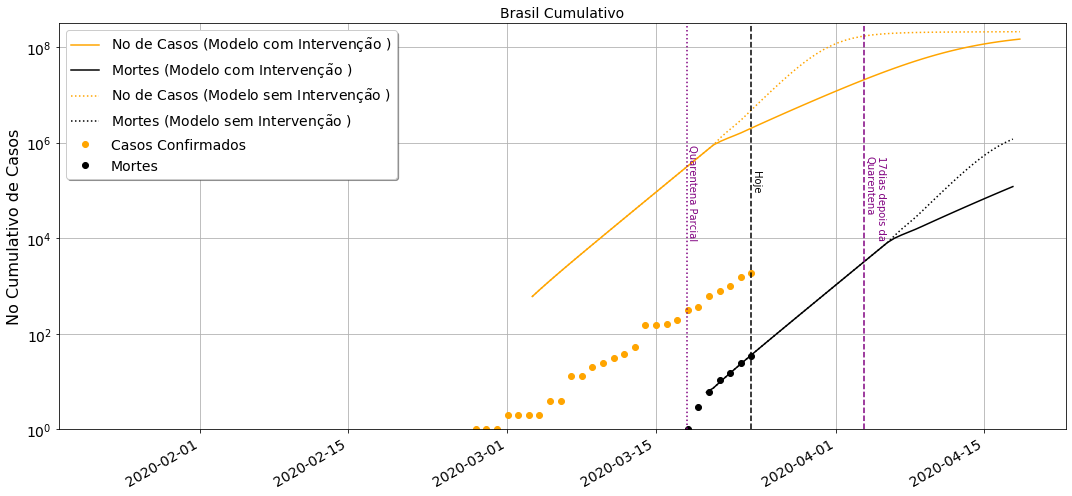

In [15]:
country = select_country('Brazil')
f = plottage(country,RK3(country))

Parametros para: Itália
Tempo de Dobra = 8.902  dias
Infecções acumuladas= 63927
fim da simulação t = 25 dias 

Pessoas que evitaram a infecção, S= 88 %
Percentual de infectados:  5 %
Percentual de curados:  7 %
Número de mortos: 6077


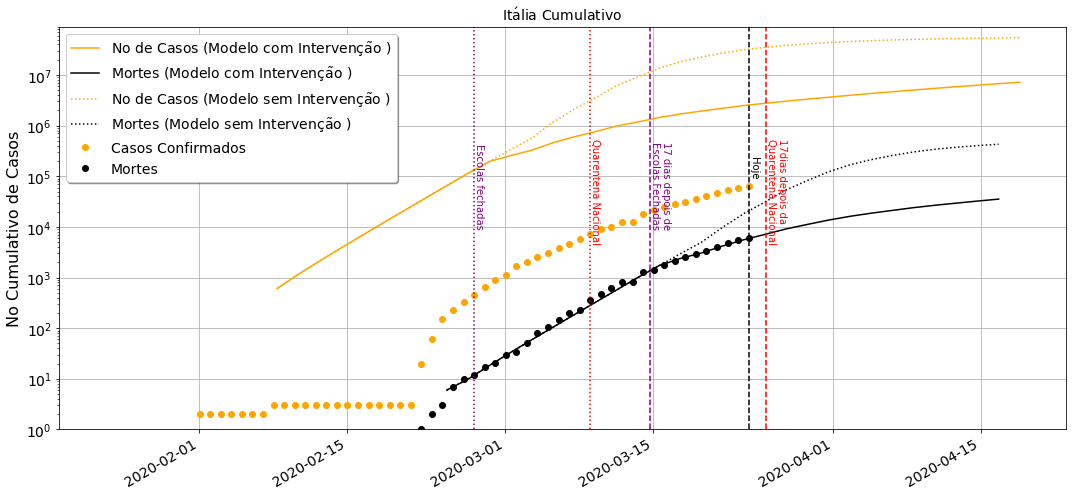

In [16]:
country = select_country('Italy')
f = plottage(country,RK3(country))

Parametros para: Espanha
Tempo de Dobra = 3.466  dias
Infecções acumuladas= 35136
fim da simulação t = 25 dias 

Pessoas que evitaram a infecção, S= 64 %
Percentual de infectados:  19 %
Percentual de curados:  17 %
Número de mortos: 2311


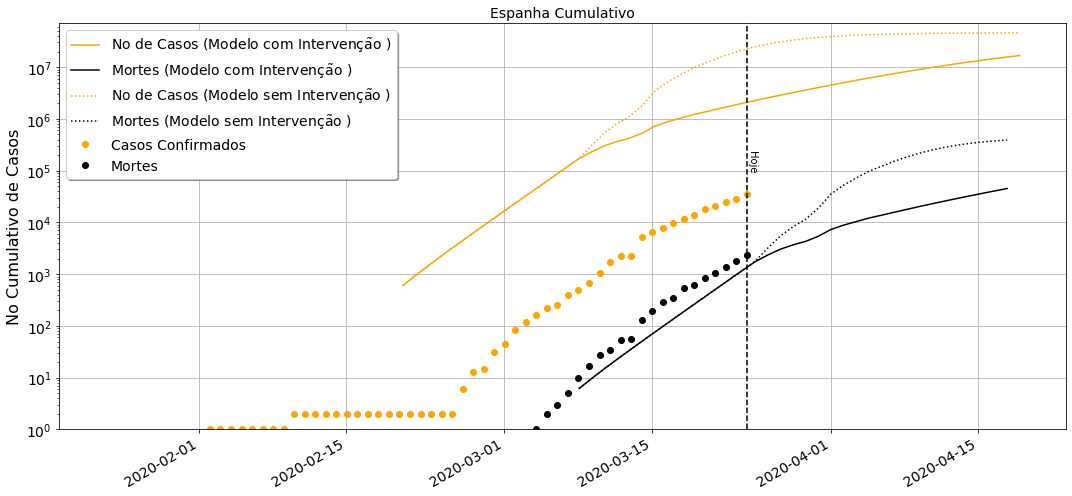

In [17]:
country = select_country('Spain')
f = plottage(country,RK3(country))

Parametros para: Irã
Tempo de Dobra = 10.972  dias
Infecções acumuladas= 23049
fim da simulação t = 26 dias 

Pessoas que evitaram a infecção, S= 95 %
Percentual de infectados:  2 %
Percentual de curados:  4 %
Número de mortos: 1812


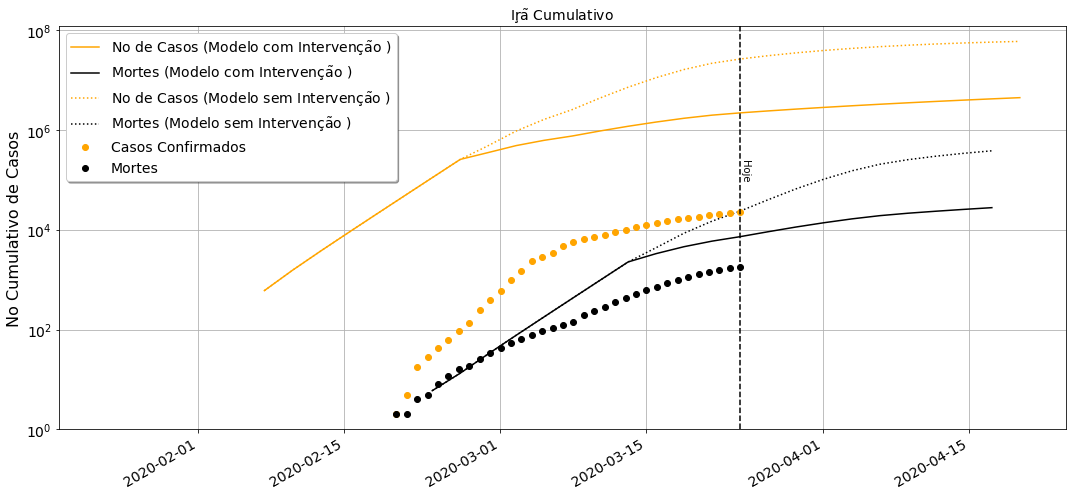

In [18]:
country = select_country('Iran')
f = plottage(country,RK3(country))

Parametros para: China
Tempo de Dobra = 896.322  dias
Infecções acumuladas= 81498
fim da simulação t = 26 dias 

Pessoas que evitaram a infecção, S= 99 %
Percentual de infectados:  0 %
Percentual de curados:  1 %
Número de mortos: 3274


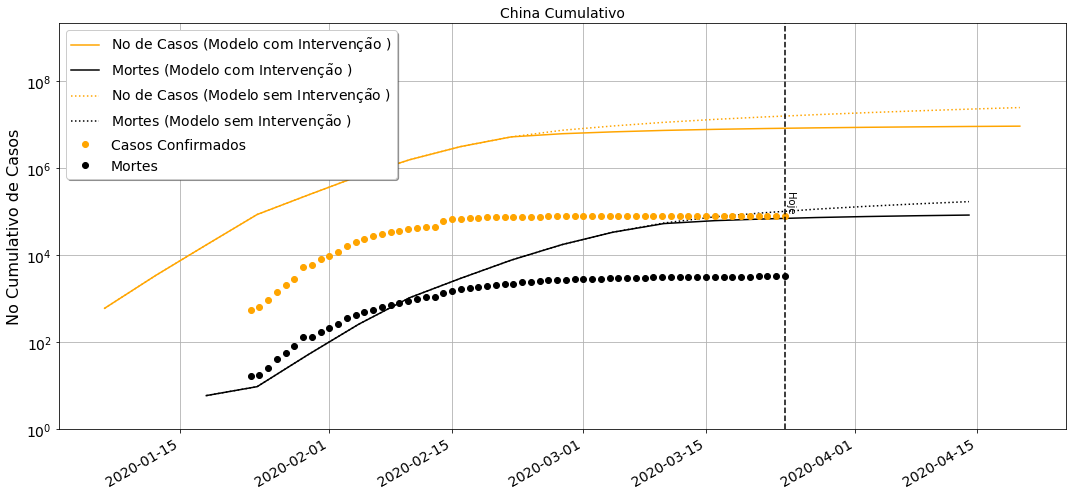

In [19]:
country = select_country('China')
f = plottage(country,RK3(country))

In [23]:
#country = select_country('US')
#f = plottage(country,RK3(country))

Parametros para: Alemanha
Tempo de Dobra = 4.459  dias
Infecções acumuladas= 29056
fim da simulação t = 25 dias 

Pessoas que evitaram a infecção, S= 98 %
Percentual de infectados:  1 %
Percentual de curados:  1 %
Número de mortos: 123


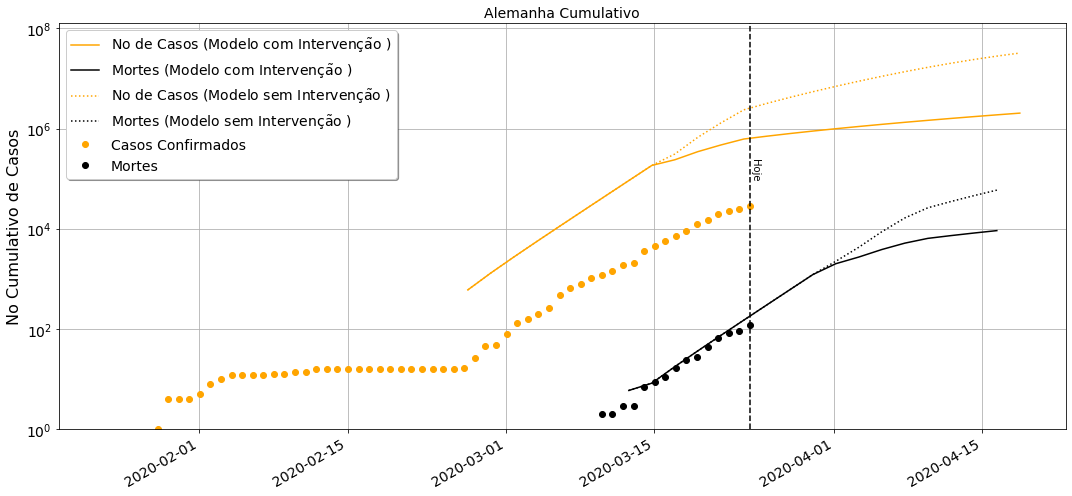

In [24]:
country = select_country('Germany')
f = plottage(country,RK3(country))

Parametros para: Coréia do Sul
Tempo de Dobra = 0.0  dias
Infecções acumuladas= 8961
fim da simulação t = 26 dias 

Pessoas que evitaram a infecção, S= 97 %
Percentual de infectados:  1 %
Percentual de curados:  2 %
Número de mortos: 111


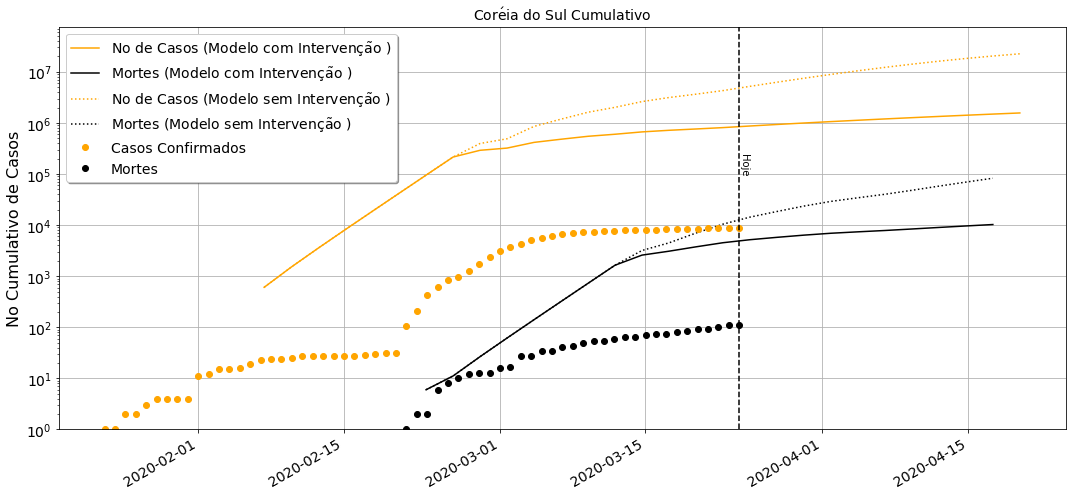

In [25]:
country = select_country('Korea, South')
f = plottage(country,RK3(country))